# PYTHON ML PROJECT :

## Book's rating Prediction


#  

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Libraries Import
# 

In [1]:
#Importing Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import time

from sklearn import metrics
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing and preparing the dataset
(The dataset has already been cleared manually for some misformatted values in csv)

In [2]:
data = pd.read_csv("Input/books.csv", sep=",")

In [3]:
#DataFrame information :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Useful fields:
- bookID to identify the book
- title to have an idea of what is the book
- authors, publisher, language_code, num_pages and publication_date to make potential link between several books / clustering
- average_rating main numerical parameter to evaluate the book that we will try to predict
- ratings_count will help us to understand the pertinence of a rating
- text_reviews_count may be useful to see the commitment of readers for the book

We can already remove isbn and isbn13 as other identifier won't be useful in our study

In [4]:
dfBooks = data.set_index("bookID").drop(['isbn','isbn13'],axis=1)
#COnverting date
dfBooks['publication_date'] = pd.to_datetime(dfBooks['publication_date'],format='%m/%d/%Y',errors='coerce')
#renaming num_pages column to remove space:
dfBooks = dfBooks.rename(columns={"  num_pages": "num_pages"})
dfBooks.head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,2005-04-26,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,2005-09-12,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-11-01,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books


In [5]:
dfBooks.tail(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,por,160,207,16,2003-08-15,Editorial Presença
45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,por,147,396,37,2003-04-08,Editorial Presença
45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,por,176,161,14,2004-09-01,Editorial Presença
45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,por,160,215,11,2003-10-11,Editorial Presença
45630,Whores for Gloria,William T. Vollmann,3.69,en-US,160,932,111,1994-02-01,Penguin Books
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books
45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,2007-02-27,Ecco



### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of the content of each field : 

# 

In [6]:
#Checking for null values inside our dataframe:
print("Any Null values in the dataset : ",dfBooks.isnull().values.any())
print("\nAny duplicate values in the dataset : ",dfBooks.duplicated().any())

Any Null values in the dataset :  True

Any duplicate values in the dataset :  False


##### We have no duplicates, but there are null values let's see if we can correct them :



In [7]:
dfBooks.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [8]:
#Parsing date must have raised some error due to the initial date format let's correct them :
dfBooks[dfBooks['publication_date'].isna()]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,NaT,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,NaT,Folio histoire


In [9]:
#DateReplace = data[(data['bookID'] == 31373) | (data['bookID'] == 45531) ]
#print(DateReplace)
dfBooks.drop([31373,45531], axis=0, inplace=True)

In [10]:
dfBooks.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [11]:
dfBooks.loc[(dfBooks['num_pages'] == 0)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,eng,0,22,4,2005-01-01,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,eng,0,3,0,2003-01-01,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,eng,0,7,2,2006-10-03,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,eng,0,12,1,2003-10-01,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,eng,0,5147,157,2005-01-01,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,eng,0,17,4,1995-11-19,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,eng,0,64,2,1999-12-01,Simon & Schuster Audio


##### These dates were unvalid so we removed these 2 rows


##### Let's see the contents of the other columns of interest
##### Language Code :

All languages and their number of appearance : 
 eng      8910
en-US    1409
spa       218
en-GB     214
fre       143
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
swe         2
rus         2
gla         1
wel         1
ale         1
nor         1
tur         1
nl          1
glg         1
srp         1
msa         1
ara         1
Name: language_code, dtype: int64


There are :  27  different languages.




<AxesSubplot:ylabel='Language Distribution'>

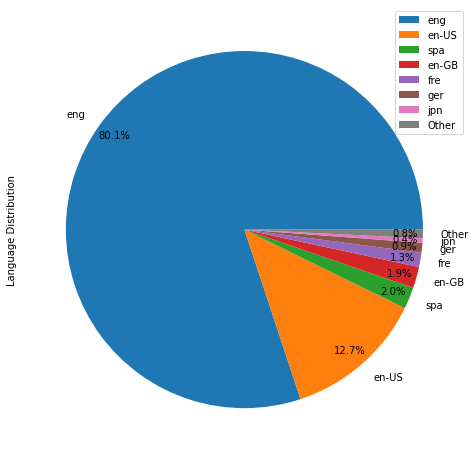

In [12]:
#Checking repartition of title or author would be irrelevant as they are meant for our understanding and not clustering

#Language repartition
AllLanguageDistribution = dfBooks.language_code.value_counts()
print("All languages and their number of appearance : \n",AllLanguageDistribution)
Nlang = AllLanguageDistribution.size
print("\n\nThere are : ",Nlang," different languages.\n\n")
TopLanguageDistribution = AllLanguageDistribution.head(7).append(pd.Series([AllLanguageDistribution.tail(Nlang-7).sum()],["Other"]))
TopLanguageDistribution.plot(kind='pie', figsize=(8,30), legend=True,autopct='%1.1f%%', 
                                                  pctdistance=0.9,radius=1,label="Language Distribution")

##### There does not seem to be any abnormal value in language, and as expected english is the main language

#### General Numerical fields :

In [13]:
dfBooks.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11125.000000,11125.000000,1.112500e+04,11125.000000
mean,3.933613,336.315326,1.793868e+04,541.925213
std,0.352473,241.104641,1.124894e+05,2576.402036
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.140000,416.000000,4.991000e+03,237.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


##### On a statistic basis the results seem normal for books, it tends to show that most books may be novels as the average number of pages is 336. There is more commitment from the reader for giving ratings than for posting reviews which is normal, as each book receive on average more than 1000 ratings we could use this to filter out irrevelant ratings.

#### Average Ratings

Text(0.5, 0, 'Rating')

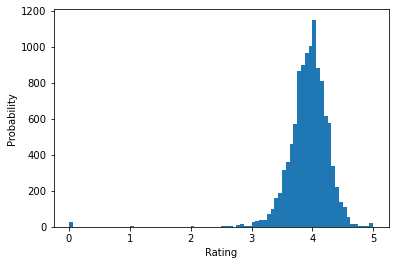

In [14]:
plt.hist(dfBooks.average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

<AxesSubplot:>

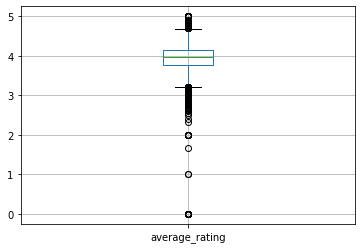

In [15]:
dfBooks.boxplot(column=['average_rating'])

Text(0.5, 0, 'Rating')

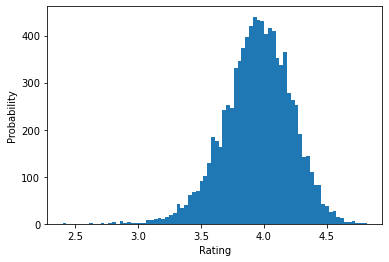

In [16]:
# Ratings distribution for books having more than 50 ratings
plt.hist(dfBooks.loc[dfBooks['ratings_count']>50].average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

##### We can see the ratings seem to follow a normal distribution centered on 3.9, by removing books having too little review it is even more visible

#### Top 10 Publishers :

In [17]:
dfBooks.publisher.value_counts().head(10)

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
HarperCollins       112
Harper Perennial    112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64

#### Distribution of Publication Date recorded on the website :

Text(0.5, 0, 'Date')

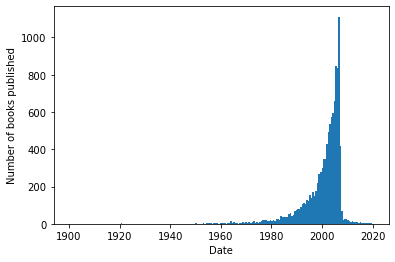

In [18]:
plt.hist(dfBooks.publication_date,bins=200)
plt.ylabel('Number of books published')
plt.xlabel('Date')

##### There is a drop after 2006, by checking the data it is normal on data side : it seems the website is not filed with much data starting from 2006 publication date.

In [19]:
dfBooks.corr()

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.150763,0.038209,0.033740
num_pages,0.150763,1.000000,0.034387,0.037043
ratings_count,0.038209,0.034387,1.000000,0.865978
text_reviews_count,0.033740,0.037043,0.865978,1.000000


At first the only correlation visible is between ratings_count and text_review_count as we could expect since usually the more there are users giving a rating, the more there will be review posted

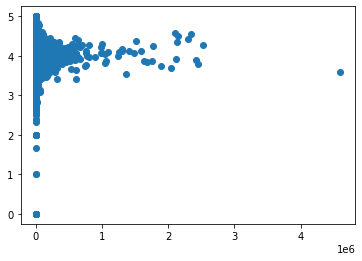

In [20]:
plt.scatter(dfBooks['ratings_count'],dfBooks['average_rating'])

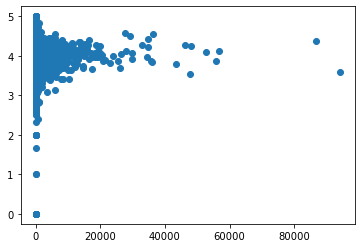

In [21]:
plt.scatter(dfBooks['text_reviews_count'],dfBooks['average_rating'])

In [22]:
dfBooks.head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,2005-04-26,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,2005-09-12,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-11-01,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books


### Linear Regression on numerical data

In [23]:
#Study dataframe (removing title as it is unecessary for clustering and prediction) :
#df = dfBooks.drop(['title','authors','language_code','publisher','publication_date'],axis=1)
df = dfBooks.copy()

df_train, df_test = train_test_split(df,test_size = 0.2)
df_train

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
39305,Minion (Vampire Huntress #1),L.A. Banks,3.44,eng,286,5531,493,2004-05-04,St. Martin's Paperback
10269,Haiti History and the Gods,Joan Dayan/Colin Dayan,3.95,eng,362,37,1,1998-03-10,University of California Press
30248,Narcissus in Chains (Anita Blake Vampire Hunt...,Laurell K. Hamilton,3.90,eng,644,49695,998,2002-09-24,Jove
10581,The Mist,Stephen King/ZBS Foundation,3.95,eng,2,168,10,1993-09-01,Simon & Schuster Audio
9811,Difficult Loves,Italo Calvino,3.94,en-US,300,4084,205,1985-09-23,Mariner Books
...,...,...,...,...,...,...,...,...,...
44906,Black Hawk Down: A Story of Modern War,Mark Bowden,4.28,eng,496,368,39,2002-01-01,Signet
20694,Julius the Baby of the World,Kevin Henkes,4.28,eng,32,6697,348,1995-09-21,Greenwillow Books
25419,When I Was Puerto Rican,Esmeralda Santiago,4.02,eng,274,8632,560,1994-10-11,Vintage Books USA


In [24]:
#Size of our original dataframe, the training one and the testing one
print(len(df), len(df_train), len(df_test))

11125 8900 2225


In [25]:
# get the values of the columns for the training data
X_train = df_train.drop(['average_rating'],axis=1)
y_train = df_train['average_rating']
print(y_train)
print(X_train)

#And for test data
X_test = df_test.drop(['average_rating'],axis=1)
y_test = df_test['average_rating']

bookID
39305    3.44
10269    3.95
30248    3.90
10581    3.95
9811     3.94
         ... 
44906    4.28
20694    4.28
25419    4.02
1494     3.83
17488    4.09
Name: average_rating, Length: 8900, dtype: float64
                                                    title  \
bookID                                                      
39305                       Minion (Vampire Huntress  #1)   
10269                        Haiti  History  and the Gods   
30248   Narcissus in Chains (Anita Blake  Vampire Hunt...   
10581                                            The Mist   
9811                                      Difficult Loves   
...                                                   ...   
44906              Black Hawk Down: A Story of Modern War   
20694                       Julius  the Baby of the World   
25419                             When I Was Puerto Rican   
1494                                             Alcestis   
17488         Five on a Treasure Island (Famous Five  #1

In [26]:
# get the values of the columns for the training data
X_train = df_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']]#.values
y_train = df_train.average_rating#.values
print(y_train)
print(X_train)

#And for test date
X_test = df_test.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']]#.values
y_test = df_test.average_rating#.values

bookID
39305    3.44
10269    3.95
30248    3.90
10581    3.95
9811     3.94
         ... 
44906    4.28
20694    4.28
25419    4.02
1494     3.83
17488    4.09
Name: average_rating, Length: 8900, dtype: float64
        num_pages  ratings_count  text_reviews_count
bookID                                              
39305         286           5531                 493
10269         362             37                   1
30248         644          49695                 998
10581           2            168                  10
9811          300           4084                 205
...           ...            ...                 ...
44906         496            368                  39
20694          32           6697                 348
25419         274           8632                 560
1494          142           1950                  95
17488         256          19173                 658

[8900 rows x 3 columns]


In [27]:
# Model Initialization
#linear_model = LogisticRegression(random_state=0,max_iter=5000)
linear_model = LinearRegression()

# Model Training
linear_model.fit(X=X_train, y=y_train)

LinearRegression()

In [28]:
y_test_predicted = linear_model.predict(X_test)

linear_model.score(X_test,y_test)

0.028458927430414227

In [29]:
linear_model.score(X_test,y_test)

0.028458927430414227

In [30]:
dfBooks

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books


## Converting Alphabetical Data to Numerical through ranking system

In [31]:
#Author adaptation
dfBooks2 = dfBooks.copy()

author_meanrating = dfBooks2[["authors","average_rating"]].groupby(["authors"]).mean().sort_values(by=['average_rating'])
author_ranking = author_meanrating
author_ranking['author_rank'] = author_meanrating["average_rating"].rank(method='dense', ascending=False)
author_ranking.tail(50)


new_book_df1 = dfBooks.merge(author_ranking,  on='authors',suffixes=('','_y')).drop( ['average_rating_y','authors'],axis=1)
new_book_df1

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,32.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,32.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,32.0
3,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,2004-09-13,Scholastic,32.0
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,32.0
...,...,...,...,...,...,...,...,...,...
11120,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,2003-08-15,Editorial Presença,323.0
11121,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,2003-04-08,Editorial Presença,323.0
11122,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,2004-09-01,Editorial Presença,323.0
11123,O Príncipe Caspian (As Crónicas de Nárnia #4),3.97,por,160,215,11,2003-10-11,Editorial Presença,323.0


In [32]:
#Publisher adaptation

publisher_meanrating = new_book_df1[["publisher","average_rating"]].groupby(["publisher"]).mean().sort_values(by=['average_rating'])
publisher_ranking = publisher_meanrating
publisher_ranking['publisher_rank'] = publisher_meanrating["average_rating"].rank(method='dense', ascending=False)
publisher_ranking.tail(50)


new_book_df2 = new_book_df1.merge(publisher_ranking,  on='publisher',suffixes=('','_y')).drop( ['average_rating_y','publisher'],axis=1)
new_book_df2

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,author_rank,publisher_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006-09-16,32.0,207.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004-09-01,32.0,207.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004-05-01,32.0,207.0
3,The Long-Lost Map (Ulysses Moore #2),4.00,eng,272,1693,76,2006-07-01,335.0,207.0
4,The Eternity Code (Artemis Fowl #3),4.04,eng,309,221,13,2003-10-01,460.0,207.0
...,...,...,...,...,...,...,...,...,...
11120,A Última Batalha (As Crónicas de Nárnia #7),4.03,por,149,211,24,2004-07-17,323.0,278.0
11121,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,2003-08-15,323.0,278.0
11122,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,2003-04-08,323.0,278.0
11123,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,2004-09-01,323.0,278.0


In [33]:
#Transformation for publication date (Numerical timestamp give information of the relative time ranking)


#x = dfBooks.iloc[1]['publication_date'].strftime("%d/%m/%Y")
new_book_df3 = new_book_df2
new_book_df3['publidate'] = new_book_df3['publication_date'].apply(lambda x: x.value)
new_book_df3 = new_book_df3.drop( ['publication_date'],axis=1)

new_book_df3


,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,32.0,207.0,1158364800000000000
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,32.0,207.0,1093996800000000000
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,32.0,207.0,1083369600000000000
3,The Long-Lost Map (Ulysses Moore #2),4.00,eng,272,1693,76,335.0,207.0,1151712000000000000
4,The Eternity Code (Artemis Fowl #3),4.04,eng,309,221,13,460.0,207.0,1064966400000000000
...,...,...,...,...,...,...,...,...,...
11120,A Última Batalha (As Crónicas de Nárnia #7),4.03,por,149,211,24,323.0,278.0,1090022400000000000
11121,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,323.0,278.0,1060905600000000000
11122,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,323.0,278.0,1049760000000000000
11123,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,323.0,278.0,1093996800000000000


In [34]:
#Language adaptation

language_meanrating = new_book_df3[["language_code","average_rating"]].groupby(["language_code"]).mean().sort_values(by=['average_rating'])
language_ranking = language_meanrating
language_ranking['language_rank'] = language_meanrating["average_rating"].rank(method='dense', ascending=False)
#language_ranking.tail(50)


new_book_df4 = new_book_df3.merge(language_ranking,  on='language_code',suffixes=('','_y')).drop( ['average_rating_y','language_code'],axis=1)
new_book_df4


,title,average_rating,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate,language_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,32.0,207.0,1158364800000000000,17.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,32.0,207.0,1093996800000000000,17.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,32.0,207.0,1083369600000000000,17.0
3,The Long-Lost Map (Ulysses Moore #2),4.00,272,1693,76,335.0,207.0,1151712000000000000,17.0
4,The Eternity Code (Artemis Fowl #3),4.04,309,221,13,460.0,207.0,1064966400000000000,17.0
...,...,...,...,...,...,...,...,...,...
11120,Venac sonetnih venaca; Puževa srma,0.00,222,0,0,838.0,792.0,820454400000000000,27.0
11121,Os libros arden mal,3.36,741,36,2,772.0,748.0,1151107200000000000,26.0
11122,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.00,150,1,0,1.0,1.0,551318400000000000,1.0
11123,In Wonderland,3.60,185,86,8,511.0,704.0,1062374400000000000,23.0


In [35]:
#correlation between columns
book_df_processed = new_book_df4.drop(columns=[ 'title'])

book_df_processed.corr()

,average_rating,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate,language_rank
average_rating,1.000000,0.150763,0.038209,0.033740,-0.780395,-0.508540,-0.027938,-0.088992
num_pages,0.150763,1.000000,0.034387,0.037043,-0.117961,-0.029265,-0.017974,0.007965
ratings_count,0.038209,0.034387,1.000000,0.865978,-0.025192,-0.010364,0.043938,-0.023707
text_reviews_count,0.033740,0.037043,0.865978,1.000000,-0.015846,0.012121,0.065969,-0.026446
author_rank,-0.780395,-0.117961,-0.025192,-0.015846,1.000000,0.537324,0.037565,0.097407
publisher_rank,-0.508540,-0.029265,-0.010364,0.012121,0.537324,1.000000,0.013653,0.099033
publidate,-0.027938,-0.017974,0.043938,0.065969,0.037565,0.013653,1.000000,0.034764
language_rank,-0.088992,0.007965,-0.023707,-0.026446,0.097407,0.099033,0.034764,1.000000


In [36]:
#Splitting data for training and testing :

def SplitData(df):
    
        df2 = df.copy()

        df_train, df_test = train_test_split(df2,test_size = 0.2)

        X_train = df_train.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                              'publisher_rank','publidate']].values
        y_train = df_train.average_rating.values

        X_test = df_test.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                              'publisher_rank','publidate']].values
        y_test = df_test.average_rating.values
        
        Output = (X_train, y_train, X_test, y_test)
        
        return Output
        
        
(X_train, y_train, X_test, y_test) = SplitData(book_df_processed)

In [37]:
#Function to test model function

def ModelPrecision(df,model,n):
    
        PrecisionList = []

        for i in range(n):

                (X_train, y_train, X_test, y_test) = SplitData(df)

                #lri = LinearRegression()
                model.fit(X_train, y_train)

                score = model.score(X_test,y_test)

                PrecisionList.append(score)
            
        return sum(PrecisionList)/len(PrecisionList)
    
def SplitDataFac(df):
        
        df2 = df.copy()

        df_train, df_test = train_test_split(df2,test_size = 0.2)

        X_train = df_train.loc[:,['authors', 'num_pages','language_code','ratings_count','text_reviews_count',
                              'publisher','publication_date']].values
        y_train = df_train.average_rating.values

        X_test = df_test.loc[:,['authors', 'num_pages','language_code','ratings_count','text_reviews_count',
                              'publisher','publication_date']].values
        y_test = df_test.average_rating.values
        
        Output = (X_train, y_train, X_test, y_test)
        
        return Output
    
def SplitDataLog(df):
        df2 = df.copy()
        lab = preprocessing.LabelEncoder()
        df2["average_rating"] = lab.fit_transform(df2["average_rating"])
        
        df_train, df_test = train_test_split(df2,test_size = 0.2)

        X_train = df_train.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                              'publisher_rank','publidate']].values
        y_train = df_train.average_rating.values

        X_test = df_test.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                              'publisher_rank','publidate']].values
        y_test = df_test.average_rating.values
        
        
        Output = (X_train, y_train, X_test, y_test)
        
        return Output
    
    
def ModelPrecisionFac(df,model,n):
    
        PrecisionList = []

        for i in range(n):

                (X_train, y_train, X_test, y_test) = SplitDataFac(df)

                #lri = LinearRegression()
                model.fit(X_train, y_train)

                score = model.score(X_test,y_test)

                PrecisionList.append(score)
            
        return sum(PrecisionList)/len(PrecisionList)
    
    
def ModelPrecisionLog(df,model,n):
    
        PrecisionList = []

        for i in range(n):

                (X_train, y_train, X_test, y_test) = SplitDataLog(df)

                #lri = LinearRegression()
                model.fit(X_train, y_train)

                score = model.score(X_test,y_test)

                PrecisionList.append(score)
            
        return sum(PrecisionList)/len(PrecisionList)
    

In [38]:
#Linear Model :

lr = LinearRegression()
lr.fit(X_train, y_train)

y_test_predicted = lr.predict(X_test)

lr.score(X_test,y_test)

0.630836203208297

In [39]:
#Evaluating precision of different models :
ModelPrecisions = pd.DataFrame(columns=["Precision"])

#Linear Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
P_lr = ModelPrecision(book_df_processed,lr,10)
ModelPrecisions.loc["Linear Regression"] = [P_lr]

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
P_dtr = ModelPrecision(book_df_processed,dtr,10)
ModelPrecisions.loc["Decision Tree Regressor"] = [P_dtr]

#Random Forest Regressor: (slow so less than n=10)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
P_rfr = ModelPrecision(book_df_processed,rfr,5)
ModelPrecisions.loc["Random Forest Regressor"] = [P_rfr]

#Logistic Regression : 
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
P_LogReg = ModelPrecisionLog(book_df_processed,LogReg,1)
ModelPrecisions.loc["Logistic Regression"] = [P_LogReg]


ModelPrecisions

,Precision
Linear Regression,0.651797
Decision Tree Regressor,0.741093
Random Forest Regressor,0.868764
Logistic Regression,0.019326


In [40]:
dfBooks

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books


### Factorize Alphabetical data

In [41]:
def fac_df(df):
    #factorizes every column in the dataframe, starting with 0. 
    df = df.apply(lambda x: pd.factorize(x)[0]+1)
    return df

In [42]:
dfBooksFac = dfBooks.copy()
dfBooksFac[["title","authors","language_code","publisher"]] = fac_df(dfBooks[["title","authors","language_code","publisher"]])
dfBooksFac["publication_date"] = dfBooksFac["publication_date"].apply(lambda x: x.value)


dfBooksFac = dfBooksFac.drop("title",1)
dfBooksFac

,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,
1,1,4.57,1,652,2095690,27591,1158364800000000000,1
2,1,4.49,1,870,2153167,29221,1093996800000000000,1
4,2,4.42,1,352,6333,244,1067644800000000000,2
5,1,4.56,1,435,2339585,36325,1083369600000000000,1
8,1,4.78,1,2690,41428,164,1095033600000000000,2
...,...,...,...,...,...,...,...,...
45631,6642,4.06,1,512,156,20,1103587200000000000,317
45633,2243,4.08,1,635,783,56,596937600000000000,56
45634,2243,3.96,1,415,820,95,744163200000000000,56


In [43]:
#Evaluating precision of different models :
ModelPrecisionsFac = pd.DataFrame(columns=["Precision"])

#Linear Model
from sklearn.linear_model import LinearRegression
lrFac = LinearRegression()
P_lrFac = ModelPrecisionFac(dfBooksFac,lrFac,10)
ModelPrecisionsFac.loc["Linear Regression"] = [P_lrFac]

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtrFac = DecisionTreeRegressor()
P_dtrFac = ModelPrecisionFac(dfBooksFac,dtrFac,10)
ModelPrecisionsFac.loc["Decision Tree Regressor"] = [P_dtrFac]

#Random Forest Regressor: (slow so less than n=10)
from sklearn.ensemble import RandomForestRegressor
rfrFac = RandomForestRegressor()
P_rfrFac = ModelPrecisionFac(dfBooksFac,rfrFac,5)
ModelPrecisionsFac.loc["Random Forest Regressor"] = [P_rfrFac]



ModelPrecisionsFac

,Precision
Linear Regression,0.023009
Decision Tree Regressor,-0.480399
Random Forest Regressor,0.164742


## Deployment of our chosen model :

In [44]:
book_df_processed

,average_rating,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate,language_rank
0,4.57,652,2095690,27591,32.0,207.0,1158364800000000000,17.0
1,4.49,870,2153167,29221,32.0,207.0,1093996800000000000,17.0
2,4.56,435,2339585,36325,32.0,207.0,1083369600000000000,17.0
3,4.00,272,1693,76,335.0,207.0,1151712000000000000,17.0
4,4.04,309,221,13,460.0,207.0,1064966400000000000,17.0
...,...,...,...,...,...,...,...,...
11120,0.00,222,0,0,838.0,792.0,820454400000000000,27.0
11121,3.36,741,36,2,772.0,748.0,1151107200000000000,26.0
11122,5.00,150,1,0,1.0,1.0,551318400000000000,1.0
11123,3.60,185,86,8,511.0,704.0,1062374400000000000,23.0


In [45]:
model = RandomForestRegressor()
(X_train, y_train, X_test, y_test) = SplitData(book_df_processed)
model.fit(X_train, y_train)
score = model.score(X_test,y_test)
print(score)



0.885306202507752


In [46]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Average_rating': y_test, 'Predicted_values': y_pred})
predictions

,Average_rating,Predicted_values
0,4.14,3.7778
1,4.34,4.3482
2,4.20,4.1728
3,3.67,4.1053
4,3.79,3.8312
...,...,...
2220,4.39,4.3814
2221,4.18,4.1883
2222,4.19,4.1584
2223,4.00,4.0138


In [47]:
X_test[1]

array([ 8.6000000e+01,  5.7600000e+02,  1.7000000e+01,  1.1000000e+02,
        7.0000000e+00,  6.9000000e+01, -1.3254624e+18])

In [48]:
y_pred[1]

4.348199999999997

In [49]:
model.predict(X_test[1].reshape(1, -1))

array([4.3482])

In [50]:
#Predict function to use and 1 row or several to get expected average rating
def predict():
    author = input("author ?")
    publisher = input("Publisher ?")
    num_pages = int(input("Number of pages ?"))
    num_ratings = int(input("Number of Ratings ?"))
    num_text_reviews = int(input("Number of Text review ?"))
    language = input("Language ?")
    publication_date = input("Publication Date (yyyy-mm-dd) ?")
    date = datetime.strptime(publication_date, '%Y-%m-%d')
    
    #Transforming author :
    if author_ranking.index.str.contains(author).any():
        author_rank = author_ranking.loc[author].author_rank
    else :
        author_rank = max(author_ranking.author_rank)
        
    #Transforming publisher :
    if publisher_ranking.index.str.contains(publisher).any():
        publisher_rank = publisher_ranking.loc[publisher].publisher_rank
    else :
        publisher_rank = max(publisher_ranking.publisher_rank)
        
    #Transforming language :
    if language_ranking.index.str.contains(language).any():
        language_rank = language_ranking.loc[language].language_rank
    else :
        language_rank = max(language_ranking.language_rank)
        
    #Transforming Date:
    publidate = datetime.timestamp(date)
    
    X_pred = np.array([author_rank, num_pages,language_rank,num_ratings,num_text_reviews,
                              publisher_rank,publidate]).reshape(1, -1)
    
    y_pred = model.predict(X_pred)

    print("Estimated Average Rating is : ",y_pred)

In [ ]:
predict()